In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/anupprakash/Documents/Keras Tutorial/TF_2_Notebooks_and_Data/01-Pandas-Crash-Course/bank.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
data.shape

(4521, 17)

In [8]:
data.age.describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [11]:
data.nunique()

age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64

In [12]:
data.contact.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [13]:
data.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [15]:
data['y'] = LabelEncoder().fit_transform(data['y'])

In [16]:
data['poutcome'] = LabelEncoder().fit_transform(data['poutcome'])

In [17]:
data['contact'] = LabelEncoder().fit_transform(data['contact'])

In [18]:
data['month'] = LabelEncoder().fit_transform(data['month'])

In [19]:
data['loan'] = LabelEncoder().fit_transform(data['loan'])

In [20]:
data['housing'] = LabelEncoder().fit_transform(data['housing'])

In [21]:
data['default'] = LabelEncoder().fit_transform(data['default'])

In [22]:
data['education'] = LabelEncoder().fit_transform(data['education'])

In [23]:
data['marital'] = LabelEncoder().fit_transform(data['marital'])

In [24]:
data['job'] = LabelEncoder().fit_transform(data['job'])

In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521.0,4.411192,3.255716,0.0,1.0,4.0,7.0,11.0
marital,4521.0,1.147755,0.599650,0.0,1.0,1.0,2.0,2.0
education,4521.0,1.231365,0.748744,0.0,1.0,1.0,2.0,3.0
default,4521.0,0.016810,0.128575,0.0,0.0,0.0,0.0,1.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521.0,0.566025,0.495676,0.0,0.0,1.0,1.0,1.0
loan,4521.0,0.152842,0.359875,0.0,0.0,0.0,0.0,1.0
contact,4521.0,0.652289,0.901498,0.0,0.0,0.0,2.0,2.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [29]:
temp = StandardScaler().fit_transform(data.drop('y',1))

In [31]:
bankData = pd.DataFrame(temp , columns = data.columns[:-1])

In [32]:
bankData['y'] = data['y']

In [33]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,0
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961,0
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961,0
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413,0
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,0


In [35]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [36]:
xTrain,xTest, yTrain,yTest = train_test_split(bankData.drop('y',1),bankData['y'],test_size=0.2)

In [37]:
rf = RandomForestClassifier().fit(xTrain,yTrain)

In [40]:
set(rf.feature_importances_)

{0.0016585688515846975,
 0.008923580408587255,
 0.02075959165009965,
 0.021292335266422036,
 0.02729020837824618,
 0.027512226818156543,
 0.02883602525110797,
 0.03883020720005616,
 0.047538128415453774,
 0.047977908940735725,
 0.05140002606928601,
 0.08051600458179037,
 0.09103676404689626,
 0.10294330891171151,
 0.10789127399278868,
 0.29559384121707727}

In [41]:
yTrain.value_counts()

0    3197
1     419
Name: y, dtype: int64

In [43]:
xTrain,yTrain = SMOTE(k_neighbors=5).fit_sample(xTrain,yTrain)

In [44]:
yTrain.value_counts()

1    3197
0    3197
Name: y, dtype: int64

In [45]:
rf = RandomForestClassifier().fit(xTrain,yTrain)

In [51]:
sig = rf.feature_importances_

In [52]:
copyData = bankData.copy()

In [53]:
copyData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,0
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961,0
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961,0
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413,0
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,0


In [59]:
copyData.drop('y',1,inplace=True)

In [60]:
copyData.drop(copyData.columns[sig<0.05],1,inplace=True)

In [61]:
copyData.head()

,age,job,balance,day,month,duration,campaign
0,-1.056270,1.716804,0.121072,0.374052,1.485414,-0.711861,-0.576829
1,-0.772583,0.795246,1.118644,-0.596026,0.819288,-0.169194,-0.576829
2,-0.583458,-0.126313,-0.024144,0.010273,-1.845220,-0.303898,-0.576829
3,-1.056270,-0.126313,0.017726,-1.566105,0.153161,-0.250017,0.387967
4,1.686036,-1.047871,-0.472753,-1.323585,0.819288,-0.146102,-0.576829


In [70]:
x_train,xTest, yTrain,yTest = train_test_split(copyData,bankData['y'],test_size=0.2)

In [71]:
x_train.shape

(3616, 7)

In [72]:
xTrain,yTrain = SMOTE(k_neighbors=4).fit_sample(x_train,yTrain)

In [73]:
xTrain.shape

(6400, 7)

In [74]:
yTrain.value_counts()

1    3200
0    3200
Name: y, dtype: int64

In [64]:
from keras.models import Sequential
from keras.layers import Dropout,Dense
from keras.callbacks import EarlyStopping

In [83]:
model = Sequential()

In [84]:
model.add(Dense(20,activation='relu',input_shape=(7,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [85]:
model.fit(xTrain,yTrain,validation_data=(xTest,yTest),epochs=200,verbose=0)

In [86]:
model.evaluate(xTest,yTest)

905/905 [==============================] - 0s 35us/step


0.6666823928064322

In [87]:
model.evaluate(xTrain,yTrain)

6400/6400 [==============================] - 0s 21us/step


0.16099594350904226

In [88]:
his = pd.DataFrame(model.history.history)

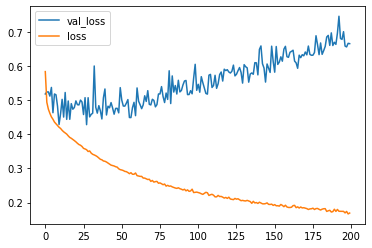

In [89]:
his.plot()

In [93]:
model = Sequential()
model.add(Dense(20,activation='relu',input_shape=(7,)))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [94]:
call = EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=0)

In [95]:
model.fit(xTrain,yTrain,callbacks=[call],validation_data=(xTest,yTest),epochs=200)

Train on 6400 samples, validate on 905 samples
Epoch 1/200
6400/6400 [==============================] - 1s 104us/step - loss: 0.5691 - val_loss: 0.5197
Epoch 2/200
6400/6400 [==============================] - 0s 56us/step - loss: 0.4993 - val_loss: 0.5065
Epoch 3/200
6400/6400 [==============================] - 0s 64us/step - loss: 0.4806 - val_loss: 0.4576
Epoch 4/200
6400/6400 [==============================] - 0s 66us/step - loss: 0.4689 - val_loss: 0.4923
Epoch 5/200
6400/6400 [==============================] - 0s 65us/step - loss: 0.4606 - val_loss: 0.4796
Epoch 6/200
6400/6400 [==============================] - 0s 71us/step - loss: 0.4523 - val_loss: 0.4853
Epoch 7/200
6400/6400 [==============================] - 0s 65us/step - loss: 0.4464 - val_loss: 0.4606
Epoch 8/200
6400/6400 [==============================] - 0s 62us/step - loss: 0.4401 - val_loss: 0.5426
Epoch 9/200
6400/6400 [==============================] - 0s 58us/step - loss: 0.4335 - val_loss: 0.5168
Epoch 10/200
640

In [96]:
his = pd.DataFrame(model.history.history)

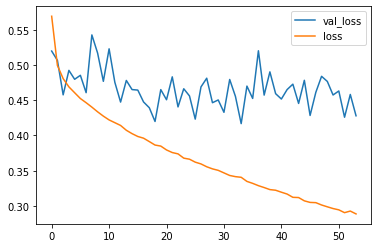

In [97]:
his.plot()

In [129]:
x_train,x_test, y_train,y_test = train_test_split(copyData,bankData['y'],test_size=0.2)

In [130]:
x_train,y_train = SMOTE(k_neighbors=4).fit_sample(x_train,y_train)

In [131]:
x_train.shape

(6382, 7)

In [133]:
y_train.value_counts()

1    3191
0    3191
Name: y, dtype: int64

In [158]:
model = Sequential()

model.add(Dense(60,activation='relu',input_shape=(7,)))
model.add(Dropout(0.5))

model.add(Dense(55,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [159]:
model.fit(x_train,y_train,callbacks=[call],validation_data=(x_test,y_test),epochs=900,verbose=0)

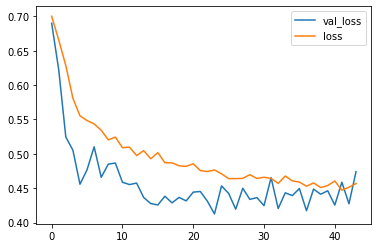

In [160]:
his = pd.DataFrame(model.history.history)

his.plot()

In [161]:
pred = model.predict_classes(xTest)

In [162]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [163]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       800
           1       0.35      0.85      0.50       105

    accuracy                           0.80       905
   macro avg       0.66      0.82      0.69       905
weighted avg       0.90      0.80      0.83       905



In [164]:
accuracy_score(yTest,pred)

0.8

In [165]:
confusion_matrix(yTest,pred)

array([[635, 165],
       [ 16,  89]])

In [166]:
x_train,x_test, y_train,y_test = train_test_split(bankData.drop('y',1),bankData['y'],test_size=0.2)

In [167]:
x_train,y_train = SMOTE(k_neighbors=4).fit_sample(x_train,y_train)

In [168]:
x_train.shape

(6398, 16)

In [169]:
model = Sequential()

model.add(Dense(60,activation='relu',input_shape=(16,)))
model.add(Dropout(0.5))

model.add(Dense(55,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [170]:
model.fit(x_train,y_train,callbacks=[call],validation_data=(x_test,y_test),epochs=900,verbose=0)

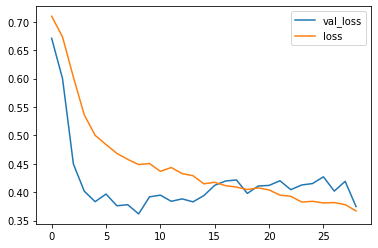

In [171]:
his = pd.DataFrame(model.history.history)

his.plot()

In [172]:
accuracy_score(yTest,pred)

0.8